# Objective:
## Generate accuracy scores with trained parameters

<h2> Run extraction.ipynb before running this script </h2>

<h2> Importing Libraries and Feature extraction scripts <\h2>

In [1]:
import spacy

In [2]:
# Libraries
import nltk
import spacy
# import en_core_web_lg
import pandas as pd
import numpy as np
import statistics
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


## Read extracted csv file which contains preprocessed data

In [3]:
df_orig = pd.read_csv('out.zip', compression='zip')
df_email = df_orig

### Extract email info and parse it into different columns

<h2> Preparing Data for Model </h2>

In [4]:
# data=pd.read_csv("semantic_feature_.csv")
data= df_email.loc[:, ~df_email.columns.str.contains('^Unnamed')]
print ("---10 Users---")
print (data.user.unique())

# Mapping users to integers to represent classes

# data['user']=data['user'].map( {'germany-c': 1,'beck-s': 2,'kaminski-v': 3,'kean-s': 4,'symes-k': 5, 'dasovich-j': 6,'mann-k': 7,
#                             'farmer-d': 8, 'jones-t': 9,  'shackleton-s': 10} ).astype(int)


---10 Users---
['germany-c' 'beck-s' 'kaminski-v' 'kean-s' 'symes-k' 'dasovich-j'
 'mann-k' 'farmer-d' 'jones-t' 'shackleton-s']


In [5]:
data_by_user=data.groupby('user').sum()
user_size=data.groupby('user').size()
print (user_size)
data_by_user

user
beck-s          10434
dasovich-j      18087
farmer-d        11768
germany-c       10163
jones-t         12222
kaminski-v      20719
kean-s          13851
mann-k          20622
shackleton-s    13330
symes-k          9455
dtype: int64


,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
user,,,,,,,,,,,,,,,,,,,,,
beck-s,132817.0,80890.593242,85952.398042,6333860,5896095,411990,5484105,146251,1521478,284492,...,67530.0,141640.0,507894.0,102985.478866,56304.0,10953.0,1159499.0,253988.0,6375.7312,433.0
dasovich-j,535300.0,111184.063427,141987.170186,28474460,25788426,1795419,23993007,791986,5839218,1856993,...,260238.0,236079.0,1783962.0,176830.188223,187671.0,87024.0,4577819.0,1218198.0,8888.3908,728.0
farmer-d,126645.0,62575.107525,78572.863057,4416515,3842491,402549,3439942,263085,1154741,302033,...,51986.0,141648.0,321075.0,114060.132727,35257.0,8199.0,790533.0,228479.0,4501.1840,206.0
germany-c,112887.0,62446.600388,54651.408442,3735619,3255745,339671,2916074,219756,1124621,255730,...,45353.0,123658.0,279652.0,89130.718145,25228.0,9386.0,673655.0,172396.0,3089.3414,168.0
jones-t,125579.0,91439.328233,93508.984610,5438231,4885377,552601,4332776,201347,1208427,330697,...,59890.0,155210.0,377495.0,129133.973344,47805.0,8955.0,895921.0,248875.0,5957.7373,194.0
kaminski-v,400661.0,96343.376660,148979.163981,13005216,11521617,1067971,10453646,514171,3027954,959614,...,121294.0,263969.0,850058.0,203739.211873,110102.0,24971.0,2061477.0,557920.0,11597.7758,1988.0
kean-s,274767.0,107010.598770,108214.157961,16540004,15301313,960268,14341045,425631,3596361,800108,...,172239.0,169395.0,1126125.0,151102.420642,120606.0,55559.0,2822669.0,665177.0,5761.3975,256.0
mann-k,199658.0,119940.996895,143984.271300,8044251,7317197,530235,6786962,240765,1911677,479174,...,98662.0,254561.0,654517.0,177848.578804,74520.0,16424.0,1405950.0,285374.0,9276.3032,1851.0
shackleton-s,171997.0,78107.838959,103448.780712,7274652,6448993,625857,5823136,349619,1599166,458654,...,74228.0,173656.0,476013.0,136414.988266,57965.0,13391.0,1188287.0,329509.0,6723.7175,302.0


### Plotting the number of emails sent by the selected 10 users

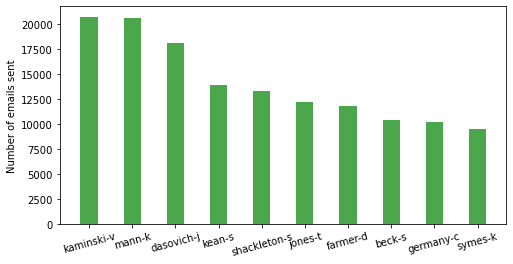

In [8]:
toPlot = user_size.sort_values(ascending=False)

# fig,ax = plt.subplots()
plt.bar(toPlot.index, toPlot, width=0.4, color="green", alpha=0.7)
plt.xticks(rotation=15)
plt.ylabel("Number of emails sent")
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.savefig("user_msg.jpg", dpi=200)
# plt.plot(list(user_size.index), user_size)

### Here we sample 9000 emails from the data set

In [11]:
data= data.groupby('user',as_index=False)
data=data.apply(lambda data: data.sample(9000))
print (data.shape)

(90000, 41)


### Extract the 37 features from the processed data

In [139]:
X=data[[ 'nr_sentences','avg_number_of_words_per_sent', 'std_deviation_len', 'nr_chars',
       'nr_alphabet', 'nr_upper', 'nr_lower', 'nr_numerics', 'nr_spaces',
       'nr_punctuation', 'nr_commas', 'nr_dots', 'nr_exclamation', 'nr_qmark',
       'nr_colons', 'nr_semicolons', 'nr_hyphens', 'num_paras', 'av_sent',
       'av_words', 'nr_words', 'avg_characters_per_word', 'nr_longwords',
       'nr_stopwords', 'nr_error', 'TTR', 'HTR', 'most_frequency', 'nr_pos',
       'nr_function', 'avg_length_np', 'nr_positive_word', 'nr_neg_word',
       'nr_neutral_word', 'nr_named_entity', 'score_semantic', 'nr_greeting']]
cols=X
Y=data[['user']]

### Do the scalar transformation

In [140]:
# Scalar Trsnformation
X=StandardScaler().fit_transform(X)
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=12)

<h2> PCA </h2>

In [148]:
pca = PCA()
components=pca.fit(train_X)

In [159]:
pca.explained_variance_[14]

0.38468380159582266

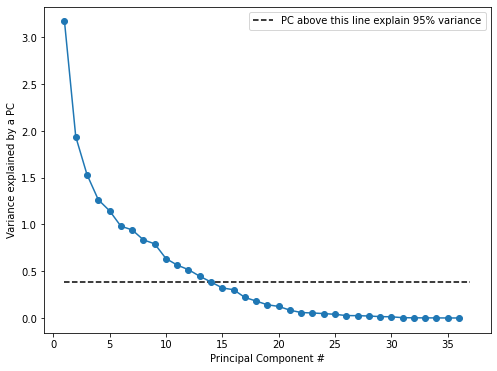

In [168]:
plt.plot(range(1, 37), pca.explained_variance_[1:], marker='o')
plt.hlines(0.38468380159582266, 1, 37, colors='k', linestyles='dashed', label="PC above this line explain 95% variance")
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.xlabel("Principal Component #")
plt.ylabel("Variance explained by a PC")
plt.legend()
plt.savefig("pca.jpg", dpi=200)
# dir(pca)

In [78]:
pca.n_components_

15

In [79]:
cols=[ 'nr_sentences','avg_number_of_words_per_sent', 'std_deviation_len', 'nr_chars',
       'nr_alphabet', 'nr_upper', 'nr_lower', 'nr_numerics', 'nr_spaces',
       'nr_punctuation', 'nr_commas', 'nr_dots', 'nr_exclamation', 'nr_qmark',
       'nr_colons', 'nr_semicolons', 'nr_hyphens', 'num_paras', 'av_sent',
       'av_words', 'nr_words', 'avg_characters_per_word', 'nr_longwords',
       'nr_stopwords', 'nr_error', 'TTR', 'HTR', 'most_frequency', 'nr_pos',
       'nr_function', 'avg_length_np', 'nr_positive_word', 'nr_neg_word',
       'nr_neutral_word', 'nr_named_entity', 'score_semantic', 'nr_greeting']
pca_df=pd.DataFrame(pca.components_,columns=cols,index = ['PC-1','PC-2','PC-3',
                'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])
pca_df

,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
PC-1,0.205907,0.026367,0.046513,0.221759,0.221050,0.135971,0.221357,0.181949,0.214383,0.204584,...,0.215100,0.061775,0.216504,0.032941,0.208189,0.196814,0.221552,0.219403,0.039462,0.002752
PC-2,0.025944,-0.298887,-0.377282,0.041770,0.041110,0.010759,0.042912,0.030590,0.029334,0.049394,...,0.030973,-0.440838,0.026904,-0.172323,0.014371,0.086635,0.036347,0.051514,-0.288718,-0.077872
PC-3,0.072125,-0.077757,-0.076541,-0.017362,-0.029340,0.027422,-0.034839,0.158958,-0.028984,0.044471,...,-0.076141,-0.075441,-0.077772,0.012045,-0.089883,-0.127620,-0.038040,0.024261,-0.068986,-0.031594
PC-4,0.058756,-0.374243,-0.100686,-0.020688,-0.032814,0.057218,-0.042151,0.080015,-0.020587,0.087884,...,-0.055125,-0.075099,-0.083855,0.484945,-0.052072,-0.068152,-0.056706,0.011966,-0.028864,-0.061636
PC-5,-0.080998,0.265729,0.079760,0.028640,0.039593,-0.053950,0.049048,-0.045567,0.042681,-0.080628,...,0.074914,-0.118938,0.066565,0.350400,0.017910,0.087736,0.057824,0.007061,-0.266472,-0.263369
PC-6,-0.034198,0.170368,0.079921,-0.022887,-0.023470,0.006452,-0.026010,-0.059133,-0.036719,0.009017,...,-0.015929,0.005448,-0.024231,0.014101,-0.035311,0.046773,-0.034978,-0.035074,-0.164702,-0.249202
PC-7,-0.006729,0.076928,0.009229,-0.002527,-0.001429,0.002448,-0.001830,-0.012701,0.000498,-0.011704,...,0.004151,-0.017744,0.007885,-0.123624,0.003095,0.013684,0.004200,-0.007634,-0.115277,-0.834841
PC-8,-0.092141,0.295146,0.212862,0.007352,0.017755,-0.048987,0.024972,-0.131036,0.007324,-0.055191,...,0.033013,-0.087361,0.054991,0.222208,0.048386,0.123493,0.026789,-0.037361,-0.212045,0.302527
PC-9,0.002553,0.123089,0.365855,0.007558,-0.000344,0.058558,-0.007400,0.040354,-0.032598,0.092697,...,-0.033493,0.151106,-0.063833,0.418960,-0.032712,-0.100377,-0.025963,0.058796,0.248291,-0.165232
PC-10,0.021817,0.164540,0.139590,-0.006775,-0.017174,0.062725,-0.025996,0.099130,-0.028743,0.074685,...,-0.012625,0.000774,-0.066469,-0.011716,-0.117014,-0.040694,-0.031157,0.039375,-0.749701,0.195234


In [80]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = cols
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df1 = pd.DataFrame(dic.items(),columns=['Principal Component','Most Important Feature'])
df1

,Principal Component,Most Important Feature
0,PC1,nr_words
1,PC2,HTR
2,PC3,av_sent
3,PC4,avg_characters_per_word
4,PC5,nr_exclamation
5,PC6,nr_qmark
6,PC7,nr_greeting
7,PC8,nr_exclamation
8,PC9,TTR
9,PC10,score_semantic


<h2> KNN </h2>

In [81]:
a = [1,2,3]
np.log(a)

array([0.        , 0.69314718, 1.09861229])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
knn = KNeighborsClassifier(n_neighbors = 150,weights ='distance',algorithm='ball_tree')
knn.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = knn.predict(test_X)
accuracy = accuracy_score(test_Y, Y_pred)
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.69      0.84      0.76      1800
           2       0.69      0.85      0.76      1800
           3       0.67      0.69      0.68      1800
           4       0.68      0.76      0.72      1800
           5       0.73      0.92      0.82      1800
           6       0.68      0.33      0.44      1800
           7       0.71      0.70      0.71      1800
           8       0.78      0.81      0.80      1800
           9       0.68      0.45      0.54      1800
          10       0.58      0.56      0.57      1800

    accuracy                           0.69     18000
   macro avg       0.69      0.69      0.68     18000
weighted avg       0.69      0.69      0.68     18000



In [27]:
# accuracies=[]
# neighbors=[]
# for i in range(200,250,5):
#     knn = KNeighborsClassifier(n_neighbors = i,weights ='distance')
# #     knn.fit(train_X, np.asarray(train_Y.values.ravel()))
# #     Y_pred = knn.predict(test_X)
# #     accuracy = accuracy_score(test_Y, Y_pred)
#     scoring="accuracy"
#     scores = cross_val_score(knn, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
#     neighbors.append(i)
#     accuracies.append(scores)
# #     print ("Neighbour:", i, " Accuracy:",accuracy)
#     print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [119]:
results_w = {'neighbors': {1: 0.5000500000000001, 2: 0.5011, 3: 0.5022499999999999, 4: 0.50465, 5: 0.505225, 6: 0.507475, 7: 0.508025, 8: 0.50955, 16: 0.514375, 32: 0.5179250000000001, 64: 0.5178, 128: 0.514325, 256: 0.50905, 512: 0.501125, 1024: 0.49312500000000004}}
results_w_bt = {'neighbors': {1: 0.510575, 2: 0.5112249999999999, 3: 0.5100750000000001, 4: 0.5131500000000001, 5: 0.5143000000000001, 6: 0.516, 7: 0.51655, 8: 0.5184, 16: 0.5253249999999999, 32: 0.526575, 64: 0.5247250000000001, 128: 0.52005, 256: 0.515925, 512: 0.5069750000000001, 1024: 0.49645}}
results_w_kt = {'neighbors': {1: 0.5055, 2: 0.5062249999999999, 3: 0.5075749999999999, 4: 0.50875, 5: 0.509875, 6: 0.5122250000000002, 7: 0.5134749999999999, 8: 0.51385, 16: 0.5213750000000001, 32: 0.523075, 64: 0.522725, 128: 0.518775, 256: 0.5137750000000001, 512: 0.50555, 1024: 0.49734999999999996}}
results_kt = {'neighbors': {1: 0.502125, 2: 0.41425, 3: 0.37595, 4: 0.35277499999999995, 5: 0.34037500000000004, 6: 0.334075, 7: 0.327925, 8: 0.325875, 16: 0.31455, 32: 0.303275, 64: 0.29209999999999997, 128: 0.278825, 256: 0.26622500000000004, 512: 0.24362500000000004, 1024: 0.22895}}
results_bt = {'neighbors': {1: 0.5021749999999999, 2: 0.41427499999999995, 3: 0.3759, 4: 0.352725, 5: 0.340375, 6: 0.33399999999999996, 7: 0.327975, 8: 0.3257, 16: 0.314525, 32: 0.30305, 64: 0.29202500000000003, 128: 0.27880000000000005, 256: 0.26644999999999996, 512: 0.24355000000000002, 1024: 0.22890000000000002}}

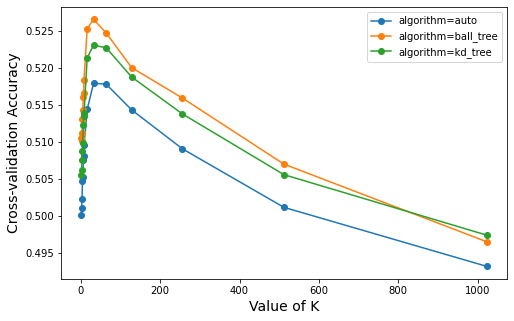

In [120]:
%matplotlib inline
plt.plot(list(results_w['neighbors'].keys()), list(results_w['neighbors'].values()), marker='o', label="algorithm=auto")
plt.plot(list(results_w_bt['neighbors'].keys()), list(results_w_bt['neighbors'].values()), marker='o', label="algorithm=ball_tree")
plt.plot(list(results_w_kt['neighbors'].keys()), list(results_w_kt['neighbors'].values()), marker='o', label="algorithm=kd_tree")
plt.xlabel('Value of K', fontsize=14)
plt.ylabel('Cross-validation Accuracy', fontsize=14)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig("knn_tuning.jpg", dpi=200)

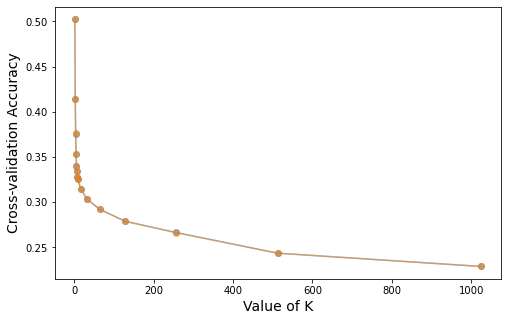

In [69]:
%matplotlib inline
plt.plot(list(results_bt['neighbors'].keys()), list(results_bt['neighbors'].values()), marker='o', alpha=0.5)
# plt.plot(list(results_w_bt['neighbors'].keys()), list(results_w_bt['neighbors'].values()), marker='o')
plt.plot(list(results_kt['neighbors'].keys()), list(results_kt['neighbors'].values()), marker='o', alpha=0.5)
plt.xlabel('Value of K', fontsize=14)
plt.ylabel('Cross-validation Accuracy', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(8, 5)

<h2> Random Forest Classifier </h2>

In [84]:
classifier = RandomForestClassifier(n_estimators = 128)
classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = classifier.predict(test_X)
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84      1800
           2       0.80      0.86      0.83      1800
           3       0.73      0.77      0.75      1800
           4       0.75      0.76      0.76      1800
           5       0.87      0.94      0.91      1800
           6       0.63      0.52      0.57      1800
           7       0.74      0.77      0.76      1800
           8       0.86      0.85      0.85      1800
           9       0.63      0.60      0.62      1800
          10       0.67      0.63      0.65      1800

    accuracy                           0.76     18000
   macro avg       0.75      0.76      0.75     18000
weighted avg       0.75      0.76      0.75     18000



In [121]:
results_rfc="""\nEstimators: 1, Time: 0.627173, accuracyaccuracy: 0.4203
Estimators: 2, Time: 1.116167, accuracyaccuracy: 0.4223
Estimators: 3, Time: 1.660541, accuracyaccuracy: 0.4706
Estimators: 4, Time: 2.2269, accuracyaccuracy: 0.5003
Estimators: 5, Time: 2.722627, accuracyaccuracy: 0.5160
Estimators: 6, Time: 3.26533, accuracyaccuracy: 0.5281
Estimators: 7, Time: 3.786454, accuracyaccuracy: 0.5351
Estimators: 8, Time: 4.30347, accuracyaccuracy: 0.5433
Estimators: 16, Time: 8.558893, accuracyaccuracy: 0.5683
Estimators: 32, Time: 17.153449, accuracyaccuracy: 0.5851
Estimators: 64, Time: 34.268173, accuracyaccuracy: 0.5977
Estimators: 128, Time: 68.645702, accuracyaccuracy: 0.6047
Estimators: 256, Time: 137.082714, accuracyaccuracy: 0.6097
Estimators: 512, Time: 271.946376, accuracyaccuracy: 0.6121"""

results_rfc = [i.split(",") for i in results_rfc.split("\n")]
results_rfc.pop(0)
# results_rfc
# print([results_rfc.split(r"Estimators|Time")])
estimators=[]
time=[]
acc=[]
for i in results_rfc:
    data = [l.split(" ") for l in i]
    estimators.append(data[0][-1])
    time.append(eval(data[1][-1]))
    acc.append(eval(data[2][-1]))
#     print()
print(time)
print(acc)
print(estimators)

[0.627173, 1.116167, 1.660541, 2.2269, 2.722627, 3.26533, 3.786454, 4.30347, 8.558893, 17.153449, 34.268173, 68.645702, 137.082714, 271.946376]
[0.4203, 0.4223, 0.4706, 0.5003, 0.516, 0.5281, 0.5351, 0.5433, 0.5683, 0.5851, 0.5977, 0.6047, 0.6097, 0.6121]
['1', '2', '3', '4', '5', '6', '7', '8', '16', '32', '64', '128', '256', '512']


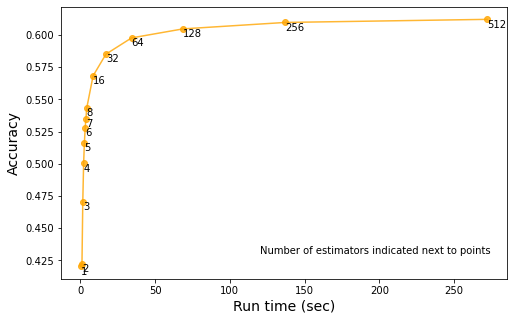

In [132]:
%matplotlib inline
plt.plot(time, acc, marker='o', alpha=0.8, color='orange')
# plt.plot(list(results_w_bt['neighbors'].keys()), list(results_w_bt['neighbors'].values()), marker='o')
# plt.plot(list(results_kt['neighbors'].keys()), list(results_kt['neighbors'].values()), marker='o', alpha=0.5)
plt.xlabel('Run time (sec)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("")
for i, txt in enumerate(estimators):
    plt.annotate(txt, (time[i], acc[i]), horizontalalignment='left', verticalalignment='top')
plt.annotate("Number of estimators indicated next to points", (120,0.43))
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig("rfc_tuning.jpg", dpi=200)

In [34]:
estimators=[]
accuracies=[]
for i in range(5,250,5):    
    classifier = RandomForestClassifier(n_estimators = i)
    classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
    Y_pred = classifier.predict(test_X)
    accuracy = accuracy_score(test_Y, Y_pred)
    estimators.append(i)
    accuracies.append(accuracy)
    print ("Estimators:", i, " Accuracy:",accuracy)

Estimators: 5  Accuracy: 0.6858888888888889
Estimators: 10  Accuracy: 0.7166111111111111
Estimators: 15  Accuracy: 0.7252777777777778
Estimators: 20  Accuracy: 0.7315
Estimators: 25  Accuracy: 0.7356111111111111
Estimators: 30  Accuracy: 0.7397222222222222
Estimators: 35  Accuracy: 0.7395
Estimators: 40  Accuracy: 0.742
Estimators: 45  Accuracy: 0.7464444444444445
Estimators: 50  Accuracy: 0.7438333333333333
Estimators: 55  Accuracy: 0.7453333333333333
Estimators: 60  Accuracy: 0.7450555555555556
Estimators: 65  Accuracy: 0.7457777777777778
Estimators: 70  Accuracy: 0.7506666666666667
Estimators: 75  Accuracy: 0.7482777777777778
Estimators: 80  Accuracy: 0.7455
Estimators: 85  Accuracy: 0.7487777777777778
Estimators: 90  Accuracy: 0.7483888888888889
Estimators: 95  Accuracy: 0.7506111111111111
Estimators: 100  Accuracy: 0.7482222222222222
Estimators: 105  Accuracy: 0.7500555555555556
Estimators: 110  Accuracy: 0.7495555555555555
Estimators: 115  Accuracy: 0.7492222222222222
Estimators:

Text(0, 0.5, 'Testing Accuracy')

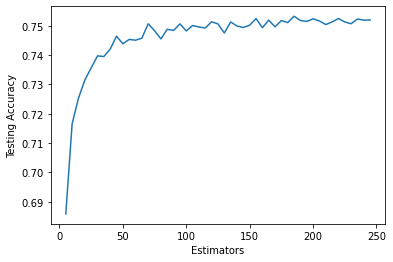

In [35]:
%matplotlib inline
plt.plot(estimators, accuracies)
plt.xlabel('Estimators')
plt.ylabel('Testing Accuracy')

<h2> SVM </h2>

In [130]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', degree = 3, coef0 = 2)
classifier.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = classifier.predict(test_X)
accuracy = accuracy_score(test_Y, Y_pred)
print ("Accuracy: ", accuracy)

Accuracy:  0.15461111111111112


#### SVM report

In [ ]:
"""
              precision    recall  f1-score   support

           1       0.44      0.28      0.34      1800
           2       0.39      0.22      0.28      1800
           3       0.31      0.62      0.42      1800
           4       0.27      0.38      0.31      1800
           5       0.79      0.18      0.30      1800
           6       0.23      0.48      0.31      1800
           7       0.50      0.23      0.32      1800
           8       0.65      0.24      0.35      1800
           9       0.27      0.29      0.28      1800
          10       0.32      0.37      0.34      1800

    accuracy                           0.33     18000
   macro avg       0.42      0.33      0.32     18000
weighted avg       0.42      0.33      0.32     18000"""

#### KNN report

In [ ]:
"""
              precision    recall  f1-score   support

           1       0.69      0.84      0.76      1800
           2       0.69      0.85      0.76      1800
           3       0.67      0.69      0.68      1800
           4       0.68      0.76      0.72      1800
           5       0.73      0.92      0.82      1800
           6       0.68      0.33      0.44      1800
           7       0.71      0.70      0.71      1800
           8       0.78      0.81      0.80      1800
           9       0.68      0.45      0.54      1800
          10       0.58      0.56      0.57      1800

    accuracy                           0.69     18000
   macro avg       0.69      0.69      0.68     18000
weighted avg       0.69      0.69      0.68     18000"""

#### RFC report

In [ ]:
"""
              precision    recall  f1-score   support

           1       0.82      0.86      0.84      1800
           2       0.80      0.86      0.83      1800
           3       0.73      0.77      0.75      1800
           4       0.75      0.76      0.76      1800
           5       0.87      0.94      0.91      1800
           6       0.63      0.52      0.57      1800
           7       0.74      0.77      0.76      1800
           8       0.86      0.85      0.85      1800
           9       0.63      0.60      0.62      1800
          10       0.67      0.63      0.65      1800

    accuracy                           0.76     18000
   macro avg       0.75      0.76      0.75     18000
weighted avg       0.75      0.76      0.75     18000"""

In [ ]:
recall = [0.33, 0.69, 0.76]
precision = [0.42, 0.69, 0.75]
accuracy = [0.32, 0.68, 0.75]

In [102]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 60

# plt.bar(x,y, color=rvb(x/N))

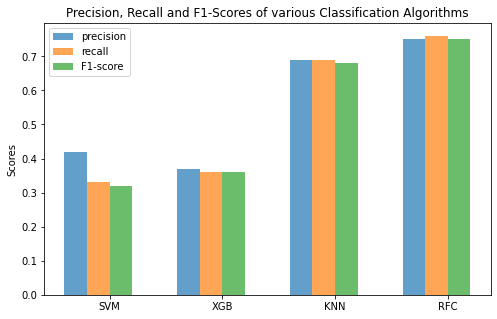

In [118]:
labels = ['SVM', 'XGB', 'KNN', 'RFC']
recall = [0.33, 0.36, 0.69, 0.76]
precision = [0.42, 0.37, 0.69, 0.75]
accuracy = [0.32, 0.36, 0.68, 0.75]

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), precision, width/3, label='precision',alpha=0.7)
rects2 = ax.bar(x - (width/6), recall, width/3, label='recall',alpha=0.7)
rects2 = ax.bar(x + (width/6), accuracy, width/3, label='F1-score', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Scores of various Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.set_size_inches(8, 5)
plt.savefig("final_scores.jpg", dpi=200)

### Final accuracy graph

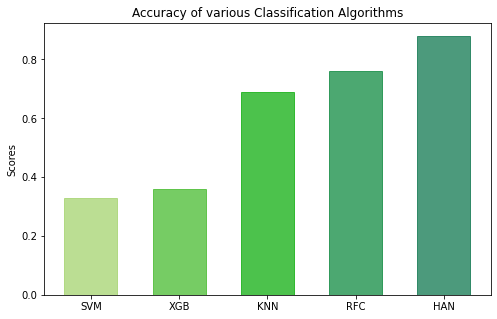

In [8]:
labels = ['SVM', 'XGB', 'KNN', 'RFC', 'HAN']
accuracy = [0.33, 0.36, 0.69, 0.76, 0.88]

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(labels, accuracy, 0.6, alpha=0.7,color="#DEEDCF")
rects[0].set_color('#9FD166')
rects[1].set_color('#3CB722')
rects[2].set_color('#00A900')
rects[3].set_color('#008335')
rects[4].set_color('#006F45')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy of various Classification Algorithms')
ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
fig.set_size_inches(8, 5)
plt.savefig("final_acc.jpg", dpi=200)